In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Premier_League.csv")

In [3]:
df.describe()
# verilerimizin genel istatistik bilgilerine göz atıyoruz

,Goals Home,Away Goals,home_possessions,away_possessions,home_shots,away_shots,home_on,away_on,home_off,away_off,...,home_duels,away_duels,home_saves,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.634211,1.218421,50.447632,49.552368,13.973684,11.313158,4.913158,3.897368,5.110526,4.236842,...,50.611053,49.391579,2.650000,3.213158,10.607895,10.957895,1.676316,1.939474,0.052632,0.026316
std,1.419944,1.183518,12.896888,12.896888,5.600541,4.908593,2.495449,2.230159,2.547365,2.397604,...,11.012290,11.010639,1.838069,1.967905,3.273213,3.481321,1.259462,1.364464,0.246063,0.160284
min,0.000000,0.000000,18.300000,18.900000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,10.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,39.900000,40.400000,10.000000,8.000000,3.000000,2.000000,3.000000,3.000000,...,43.450000,42.475000,1.000000,2.000000,8.000000,8.750000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,51.000000,49.000000,14.000000,11.000000,5.000000,4.000000,5.000000,4.000000,...,51.450000,48.550000,2.000000,3.000000,10.000000,11.000000,2.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,59.600000,60.100000,17.000000,15.000000,7.000000,5.000000,7.000000,6.000000,...,57.525000,56.550000,4.000000,5.000000,13.000000,13.000000,3.000000,3.000000,0.000000,0.000000
max,9.000000,6.000000,81.100000,81.700000,33.000000,30.000000,15.000000,11.000000,15.000000,12.000000,...,90.000000,90.000000,9.000000,11.000000,23.000000,25.000000,6.000000,7.000000,2.000000,1.000000


In [4]:
df.isnull().sum()
# kayıp gözlem var mı onu inceliyoruz

date                0
clock               0
stadium             0
attendance          0
Home Team           0
Goals Home          0
Away Team           0
Away Goals          0
home_possessions    0
away_possessions    0
home_shots          0
away_shots          0
home_on             0
away_on             0
home_off            0
away_off            0
home_blocked        0
away_blocked        0
home_pass           0
away_pass           0
home_chances        0
away_chances        0
home_corners        0
away_corners        0
home_offside        0
away_offside        0
home_tackles        0
away_tackles        0
home_duels          0
away_duels          0
home_saves          0
away_saves          0
home_fouls          0
away_fouls          0
home_yellow         0
away_yellow         0
home_red            0
away_red            0
links               0
dtype: int64

In [5]:
df.info()
# verilerimiz hakkında genel bilgi sahibi oluyoruz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              380 non-null    object 
 1   clock             380 non-null    object 
 2   stadium           380 non-null    object 
 3   attendance        380 non-null    object 
 4   Home Team         380 non-null    object 
 5   Goals Home        380 non-null    int64  
 6   Away Team         380 non-null    object 
 7   Away Goals        380 non-null    int64  
 8   home_possessions  380 non-null    float64
 9   away_possessions  380 non-null    float64
 10  home_shots        380 non-null    int64  
 11  away_shots        380 non-null    int64  
 12  home_on           380 non-null    int64  
 13  away_on           380 non-null    int64  
 14  home_off          380 non-null    int64  
 15  away_off          380 non-null    int64  
 16  home_blocked      380 non-null    int64  
 1

In [6]:
df.duplicated().sum()
# tekrarlayan satrıları kontrol ediyoruz

0

In [7]:
df.pop("links")
# linkleri önden bir çıkaralım. hiç işimize yaramayacak zaten

0      https://www.skysports.com/football/arsenal-vs-...
1      https://www.skysports.com/football/aston-villa...
2      https://www.skysports.com/football/brentford-v...
3      https://www.skysports.com/football/chelsea-vs-...
4      https://www.skysports.com/football/crystal-pal...
                             ...                        
375    https://www.skysports.com/football/leeds-unite...
376    https://www.skysports.com/football/newcastle-u...
377    https://www.skysports.com/football/tottenham-h...
378    https://www.skysports.com/football/everton-vs-...
379    https://www.skysports.com/football/crystal-pal...
Name: links, Length: 380, dtype: object

In [8]:
type(df.loc[1,"date"]) # str bir ifadeymis date yapalim

str

In [9]:
df["date"] = df["date"].str.replace(r'\d+(st|nd|rd|th)', '', regex=True).str.strip()
df['date'] = pd.to_datetime(df['date'])
df["Yil"] = df["date"].dt.year
df["Ay"] = df["date"].dt.month
df["Gun"] = df["date"].dt.day

In [10]:
df["date"].head() # dönüşümü tamamladık. şimdi yıl ay gün şeklinde ayıralım ve date kısmını silelim

0   2023-05-01
1   2023-05-01
2   2023-05-01
3   2023-05-01
4   2023-05-01
Name: date, dtype: datetime64[ns]

In [11]:
df = df.drop(['date', 'clock'], axis=1)
# date ve clock çıkaralım saat zaten işimize yaramaz

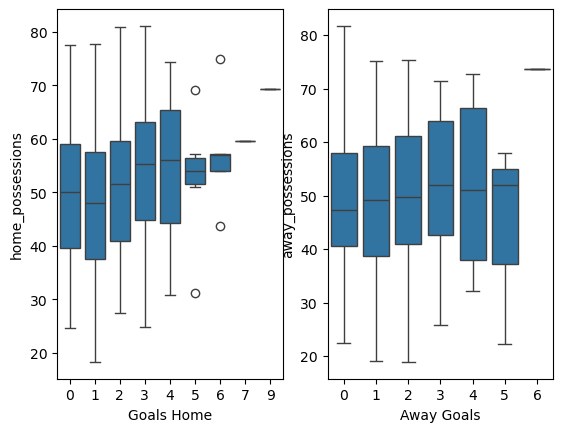

In [12]:
fig, ax = plt.subplots(1,2)

sns.boxplot(y="home_possessions",x="Goals Home", data= df, ax=ax[0])
sns.boxplot(y="away_possessions",x="Away Goals", data= df, ax=ax[1])
plt.show()
# her bir golde kaç pozisyona girilip girilmediğini inceliyoruz.
# ev takımının hiç gol atmama durumunu incelediğimizde 40-60 arası pozisyonda yoğunlaşmış bir veri görüyoruz

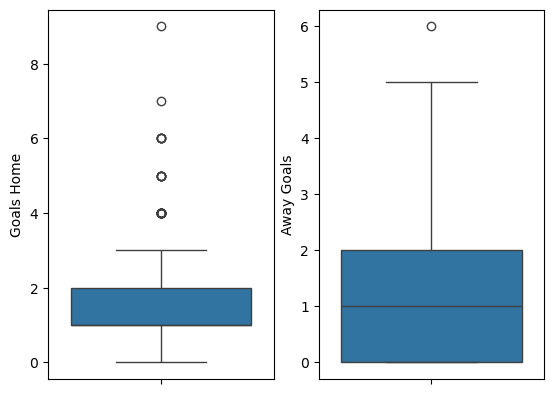

In [13]:
fig, ax = plt.subplots(1,2)

sns.boxplot(y="Goals Home", data= df, ax=ax[0])
sns.boxplot(y="Away Goals", data= df, ax=ax[1])
plt.show()
# bu grafiğimizde de ev sahibi ve deplasman takımlarının genel gol sayılarına bakıyoruz.
# ev takımı genellikle 1-2 arası gol atmışken bu aralık deplasman takımı için 0-2 arasıdır.
# ev takımının attığı gollerde de bolca aykırı değer gözlemliyoruz

In [14]:
df["gol_fark"] = df["Goals Home"] - df["Away Goals"]
df["gol_fark"].head()
# gol sayılarımızın farkını buluyoruz. bu sayede puan hesaplama işlemini de gerçekleştirebiliriz

0    5
1    1
2    1
3    0
4    0
Name: gol_fark, dtype: int64

In [15]:
fark = df["gol_fark"]

for i in range(0,len(fark)):
    if(fark[i]>0):
        df.loc[i,"puan"] = 3
    elif(fark[i]==0):
        df.loc[i,"puan"] = 1
    elif(fark[i]<0):
        df.loc[i,"puan"] = 0

In [16]:
df.loc[:,("gol_fark","puan")].head()
# her bir sutuna o macta ev sahibinin aldigi puani yazdik
# aynisini deplasman puani olarak da yapalim

,gol_fark,puan
0,5,3.0
1,1,3.0
2,1,3.0
3,0,1.0
4,0,1.0


In [17]:
for i in range(len(df)):
    if df.loc[i,"puan"]==3:
        df.loc[i,"dep_puan"] = 0
    elif(df.loc[i,"puan"]==1):
        df.loc[i,"dep_puan"] = 1
    elif(df.loc[i,"puan"]==0):
        df.loc[i,"dep_puan"] = 3

In [18]:
df["dep_puan"] = df["dep_puan"].astype(int)
df["dep_puan"].head()
# integer hale getirdik ve hem deplasman takımının hem de ev sahibinin o maçtan kaç puan 
# aldığını yazdık. şimdi bu sezon maç maç puanları kaça yükseldi ya da aynı mı kaldı bunu yapacağız
# yeni bir data frame olusturacağım ve puan tablosu adını vereceğim
# burada her bir takım için aldıkları puanı toplayacağım

0    0
1    0
2    0
3    1
4    1
Name: dep_puan, dtype: int32

In [19]:
# ev sahibi, deplasman takımı, puan, dep_puan, groupby, sum, 
home_puanlar = df.groupby("Home Team")["puan"].sum().reset_index()
away_puanlar = df.groupby("Away Team")["dep_puan"].sum().reset_index()
# ev sahibi ve deplasman puanlarını 2 listeye atadık. bu listelerdeki aynı
# takımların puanlarını toplayıp yeni bir listeye atayalım

In [20]:
toplam_puanlar = pd.merge(home_puanlar, away_puanlar, left_on="Home Team", right_on="Away Team", how="outer", suffixes=('_home', '_away'))
# pd.merge sutunları birleştirmek için kullanılır. sonra birleştirmek istediğimiz iki listeyi yazarız
# left_on ve rigth_on kısımları sol ve sağdaki listelerin hangi sütunlarına göre listeleyeceğimizi yazıyoruz
# birleştirme komutumnuz how oluyor outer yani iki date framein içerisindeki her seyi alıp birlestirir
# suffixes kısmı çok önemli home ve away team kısımlarının birbirlerini bulması için kullanılan kod
toplam_puanlar["total_puan"] = toplam_puanlar["puan"].fillna(0) + toplam_puanlar["dep_puan"].fillna(0)
# toplam puanlar listeminzde total puan diye değişken oluşturduj ve puan ile dep_puan değişkenlerini toplayıp
# listemizi tamamlamış olduk

In [21]:
toplam_puanlar=toplam_puanlar.sort_values("total_puan",ascending=False).reset_index()

In [22]:
for i in range(len(toplam_puanlar)):
    toplam_puanlar.loc[i,"takim"] = toplam_puanlar.loc[i,"Home Team"] 
toplam_puanlar.pop("Home Team")
toplam_puanlar.pop("Away Team")
toplam_puanlar.pop("index")
toplam_puanlar.head()

,puan,dep_puan,total_puan,takim
0,52.0,37,89.0,Manchester City
1,45.0,39,84.0,Arsenal
2,48.0,27,75.0,Manchester United
3,39.0,32,71.0,Newcastle United
4,44.0,23,67.0,Liverpool


### ŞAMPİYON MANCHESTER CITY
### MANCHESTER IS BLUE

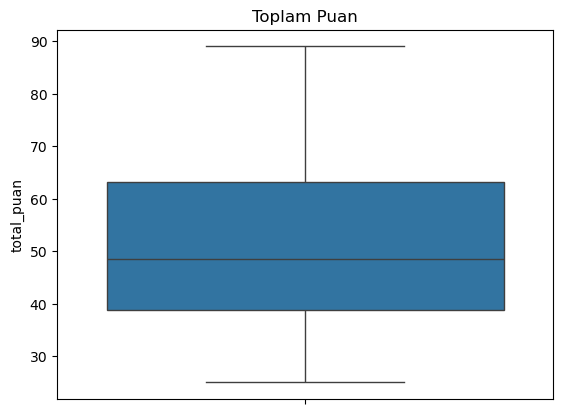

In [24]:
sns.boxplot(y="total_puan",data = toplam_puanlar)
plt.title("Toplam Puan")
plt.show()
# takımlara ait puanların aykırı değerlerini kontrol ediyoruz. burda aykırı değer olarak 
# bakıyoruz ama analiz ederken çok iyi sezon geçirmiş ya da çok kötü sezon geçirmiş olarak da düşünmek gerek

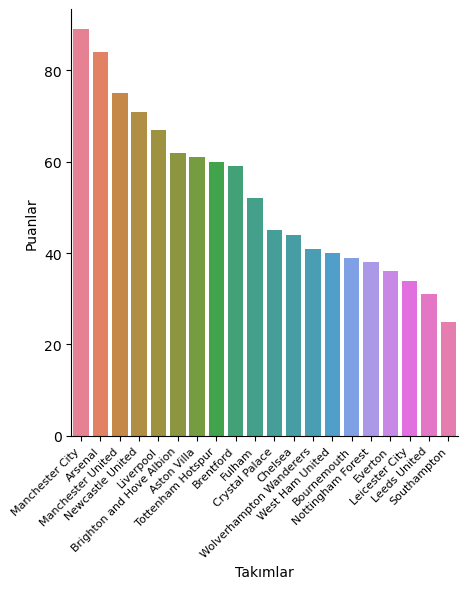

In [25]:
sns.catplot(x="takim",y="total_puan",data = toplam_puanlar,hue="takim", kind="bar")
plt.xticks(rotation=45, ha="right",fontsize=8)
plt.xlabel("Takımlar")
plt.ylabel("Puanlar")
plt.show()
# her takımın toplam puanlarının karşılaştırılması

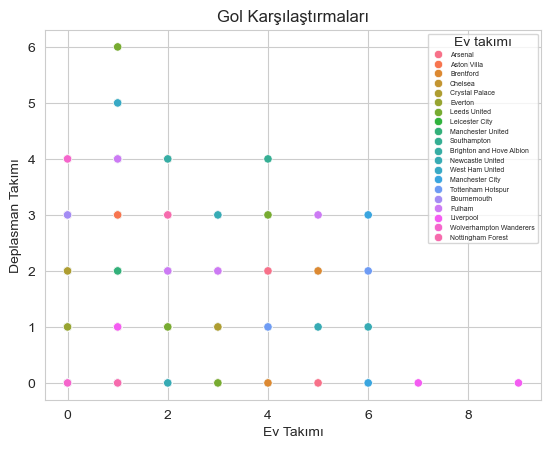

In [26]:
sns.set_style("whitegrid")
sns.scatterplot(x=df["Goals Home"],y=df["Away Goals"],hue=df["Home Team"])
plt.legend(prop={'size': 5}, loc='upper right',title = "Ev takımı")
plt.title("Gol Karşılaştırmaları")
plt.xlabel("Ev Takımı")
plt.ylabel("Deplasman Takımı")
plt.show()
# ev sahibi kac gol attiginda rakip takim ona kac gol atmis karsilastirmasi

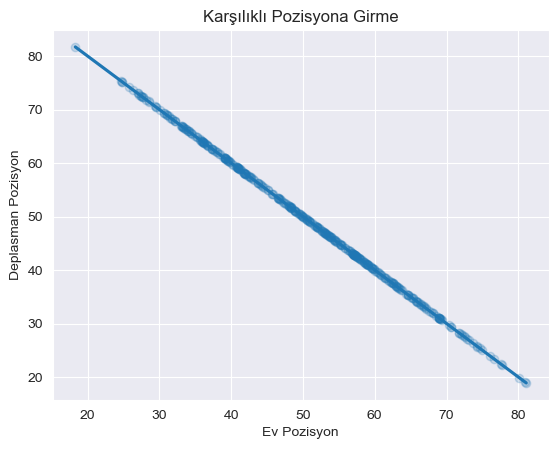

In [27]:
sns.set_style("darkgrid") 
sns.regplot(x=df["home_possessions"],y=df["away_possessions"],marker="o",scatter_kws={"alpha":0.2})
plt.title("Karşılıklı Pozisyona Girme")
plt.xlabel("Ev Pozisyon")
plt.ylabel("Deplasman Pozisyon")
plt.show()

In [28]:
# şimdi şöyle bir şey yapmak istiyorum. bunu sadece manchester city icin yapacağım
# tabloyu ters çevirip her bir puan alışında sonraki puana onu ekleyip çizgi grafiğiyle puanının
# nasıl arttığını göreceğiz. bir de arsenal ya da sonuncu takım için yaparız bakalım.
df_yeni = df.iloc[::-1].reset_index(drop=True)

In [29]:
df_ev = df_yeni.query('`Home Team` == "Manchester City" ')
df_dep = df_yeni.query('`Away Team`== "Manchester City"')

In [30]:
mc_df = pd.concat([df_ev,df_dep],axis=0)
mc_df.head()

,stadium,attendance,Home Team,Goals Home,Away Team,Away Goals,home_possessions,away_possessions,home_shots,away_shots,...,home_yellow,away_yellow,home_red,away_red,Yil,Ay,Gun,gol_fark,puan,dep_puan
13,Etihad Stadium,"53,453",Manchester City,4,Bournemouth,0,66.7,33.3,19,3,...,0,3,0,0,2022,8,1,4,3.0,0
31,Etihad Stadium,"53,112",Manchester City,4,Crystal Palace,2,74.3,25.7,18,2,...,1,2,0,0,2022,8,1,2,3.0,0
46,Etihad Stadium,"53,409",Manchester City,6,Nottingham Forest,0,74.9,25.1,17,8,...,0,1,0,0,2022,8,1,6,3.0,0
75,Etihad Stadium,"53,475",Manchester City,6,Manchester United,3,53.9,46.1,22,12,...,0,3,0,0,2022,10,1,3,3.0,0
79,Etihad Stadium,"53,365",Manchester City,4,Southampton,0,65.2,34.8,21,5,...,0,1,0,0,2022,10,1,4,3.0,0


In [31]:
mc_df = mc_df.sort_index()
mc_df = mc_df.reset_index()

In [32]:
mc_df["puan"] = mc_df["puan"].astype(int)
# float tipiydi şimdi fark ettim integer yaptım.
mc_df.pop("index")
mc_df.head()

,stadium,attendance,Home Team,Goals Home,Away Team,Away Goals,home_possessions,away_possessions,home_shots,away_shots,...,home_yellow,away_yellow,home_red,away_red,Yil,Ay,Gun,gol_fark,puan,dep_puan
0,London Stadium,"62,443",West Ham United,0,Manchester City,2,24.6,75.4,6,14,...,0,1,0,0,2022,8,1,-2,0,3
1,Etihad Stadium,"53,453",Manchester City,4,Bournemouth,0,66.7,33.3,19,3,...,0,3,0,0,2022,8,1,4,3,0
2,"St James' Park, Newcastle","52,258",Newcastle United,3,Manchester City,3,31.3,68.7,12,21,...,4,2,0,0,2022,8,1,0,1,1
3,Etihad Stadium,"53,112",Manchester City,4,Crystal Palace,2,74.3,25.7,18,2,...,1,2,0,0,2022,8,1,2,3,0
4,Etihad Stadium,"53,409",Manchester City,6,Nottingham Forest,0,74.9,25.1,17,8,...,0,1,0,0,2022,8,1,6,3,0


In [33]:
mc_df["toplam_puan"] = 0
for i in range(len(mc_df)):
    if i == 0:  
        if mc_df.loc[i, "Home Team"] == "Manchester City":
            mc_df.loc[i, "toplam_puan"] = mc_df.loc[i, "puan"]
        elif mc_df.loc[i, "Away Team"] == "Manchester City":
            mc_df.loc[i, "toplam_puan"] = mc_df.loc[i, "dep_puan"]
    else:  
        if mc_df.loc[i, "Home Team"] == "Manchester City":
            mc_df.loc[i, "toplam_puan"] = mc_df.loc[i-1, "toplam_puan"] + mc_df.loc[i, "puan"]
        elif mc_df.loc[i, "Away Team"] == "Manchester City":
            mc_df.loc[i, "toplam_puan"] = mc_df.loc[i-1, "toplam_puan"] + mc_df.loc[i, "dep_puan"]

In [34]:
mc_df["toplam_puan"].head()

0     3
1     6
2     7
3    10
4    13
Name: toplam_puan, dtype: int64

# Açıklayalım:
kodumuzun ilk if kısmı ilk haftaya ait kısım oluyor. burada ilk haftaysa eğer direkt o puanı ata
demek için böyle bir yola gittim. sonrasında ise puanı sürekli üstüne ekleme işlemiyle devam ettim.
bu şekilde her hafta yeni veri çerçevemde yeni sütunuma veriyi sürekli güncelleyerek sonunda puanıma ulaştım

Text(0.5, 1.0, 'MC Haftalık Puan Artışı')

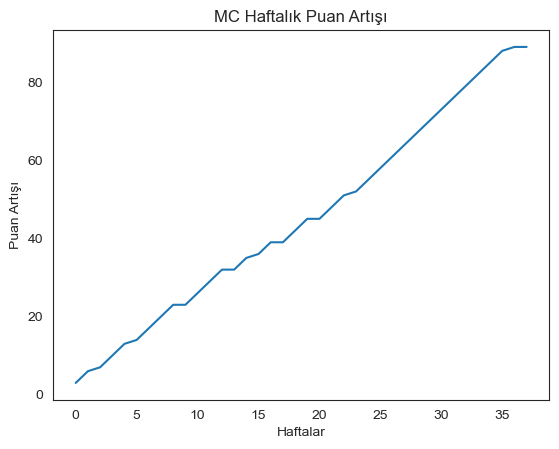

In [36]:
sns.set_style("white")
sns.lineplot(x=range(len(mc_df)), y=mc_df["toplam_puan"])
plt.xlabel("Haftalar")
plt.ylabel("Puan Artışı")
plt.title("MC Haftalık Puan Artışı")

Manchester City takımının puan artışını bu şekilde grafikleştirdik. en yakın rakibi Arsenal'ı da grafiğin üstüne eklemek için yapalım

In [38]:
ars_df = pd.DataFrame()
for i in range(len(df_yeni)):
    if i == 0:  
        if df_yeni.loc[i, "Home Team"] == "Arsenal":
            ars_df.loc[i, "toplam_puan"] = df_yeni.loc[i, "puan"]
        elif df_yeni.loc[i, "Away Team"] == "Arsenal":
            ars_df.loc[i, "toplam_puan"] = df_yeni.loc[i, "dep_puan"]
    else:  
        if df_yeni.loc[i, "Home Team"] == "Arsenal":
            ars_df.loc[i, "toplam_puan"] = max(ars_df["toplam_puan"]) + df_yeni.loc[i, "puan"]
        elif df_yeni.loc[i, "Away Team"] == "Arsenal":
            ars_df.loc[i, "toplam_puan"] = max(ars_df["toplam_puan"]) + df_yeni.loc[i, "dep_puan"]

Burada biraz aydınlanma yaşadım ve yeni data frame oluşturup da içine arsenalları doldurup da
sonra onları birleştirmeye gerek duymadığımı anladım bu şekilde hallettim.
diğeri de en azından pratik oldu diye bırakıyorum

In [40]:
ars_df = ars_df.reset_index()
ars_df.pop("index")
ars_df.head()
# indexleri de sıfırladık çünkü o haftaya ait indexler geliyordu
# 0dan baslicak sekilde aldık indexleri.

,toplam_puan
0,3.0
1,6.0
2,9.0
3,12.0
4,15.0


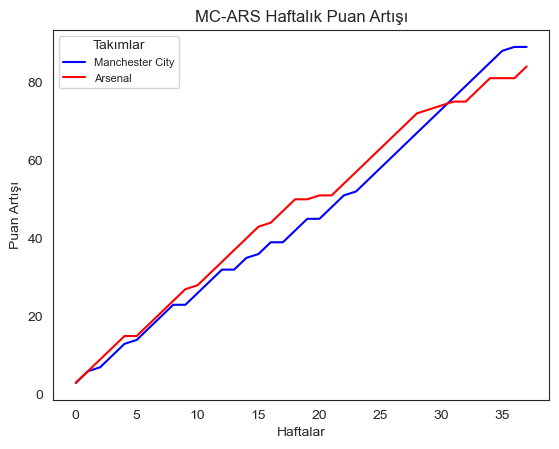

In [41]:
sns.set_style("white")
sns.lineplot(x=range(len(mc_df)), y=mc_df["toplam_puan"],label="Manchester City",color="blue")
sns.lineplot(x=range(len(ars_df)), y=ars_df["toplam_puan"],label="Arsenal",color="red")
plt.xlabel("Haftalar")
plt.ylabel("Puan Artışı")
plt.title("MC-ARS Haftalık Puan Artışı")
plt.legend(prop={'size': 8}, loc='upper left',title = "Takımlar")

"30. haftadan sonra Arsenal liderliği kaptırmış.... yazık oldu
    

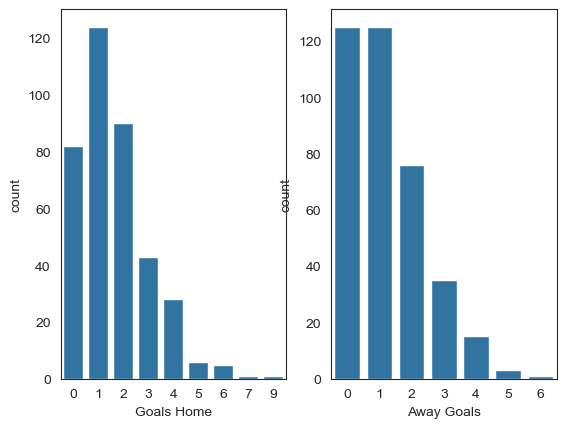

In [43]:
fig, ax =plt.subplots(1,2)
sns.countplot(x='Goals Home', data=df, ax=ax[0])
sns.countplot(x='Away Goals', data=df, ax=ax[1])
plt.show()
# ev sahibi olanların ve deplasman takımlarının toplam gol sayılarını gösteren bir grafiğimiz

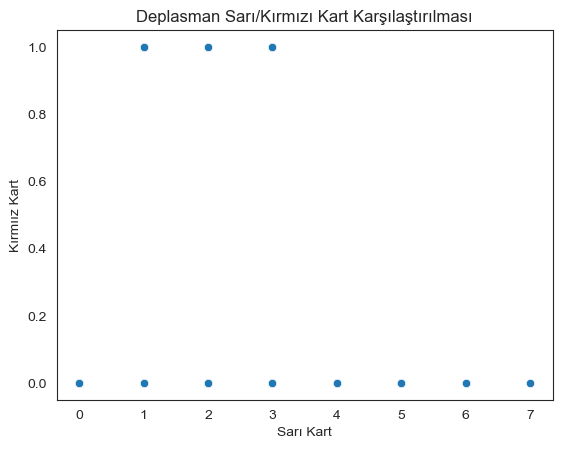

In [44]:
sns.scatterplot(x="away_yellow",y="away_red",data=df)
plt.title("Deplasman Sarı/Kırmızı Kart Karşılaştırılması")
plt.xlabel("Sarı Kart")
plt.ylabel("Kırmıız Kart")
plt.show()
# sarı kart ve kırmızıı kart karşılaştırma grafiği

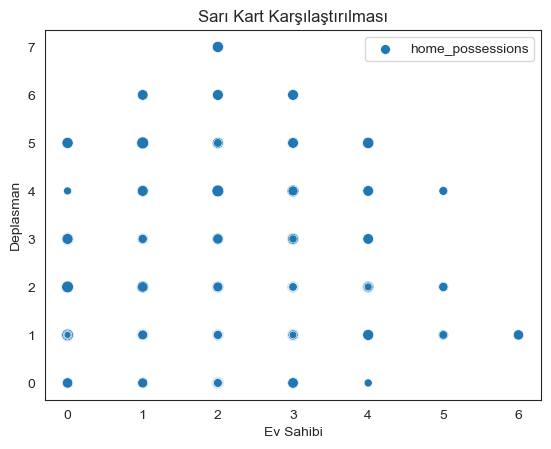

In [45]:
sns.scatterplot(x="home_yellow",y="away_yellow",s=df["home_possessions"],data=df,label="home_possessions")
plt.title("Sarı Kart Karşılaştırılması")
plt.xlabel("Ev Sahibi")
plt.ylabel("Deplasman")
plt.legend()
plt.show()
# ev sahibiyle deplasman takımının yedikleri sarı kartların karşılaştırmaları
# ev sahibinin pozisyona girmesiyle nokta boyları orantılıdır.

In [47]:
import plotly.express as px

In [53]:
df.columns

Index(['stadium', 'attendance', 'Home Team', 'Goals Home', 'Away Team',
       'Away Goals', 'home_possessions', 'away_possessions', 'home_shots',
       'away_shots', 'home_on', 'away_on', 'home_off', 'away_off',
       'home_blocked', 'away_blocked', 'home_pass', 'away_pass',
       'home_chances', 'away_chances', 'home_corners', 'away_corners',
       'home_offside', 'away_offside', 'home_tackles', 'away_tackles',
       'home_duels', 'away_duels', 'home_saves', 'away_saves', 'home_fouls',
       'away_fouls', 'home_yellow', 'away_yellow', 'home_red', 'away_red',
       'Yil', 'Ay', 'Gun', 'gol_fark', 'puan', 'dep_puan'],
      dtype='object')

In [81]:
onemli = df[["Goals Home","Away Goals","home_possessions","away_possessions"]]

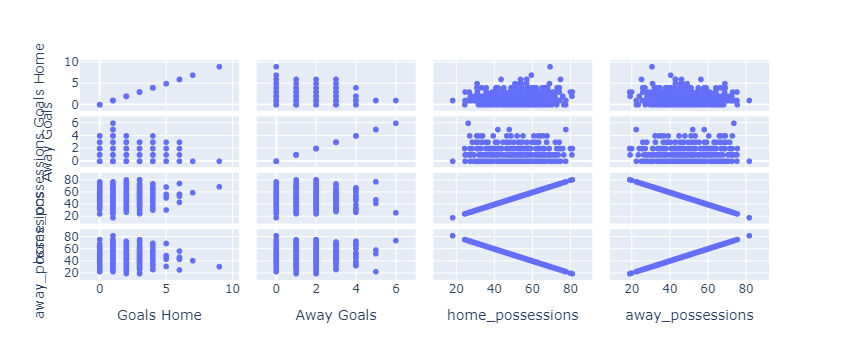

In [85]:
fig = px.scatter_matrix(onemli)
fig.show()
# goller ve pozisyonların birbirleriyle karşılaştırılması

çoklu doğrusal regresyon için verilerimizi seçelim. ev takımı kaç gol atar onu bulmaya çalışalım
burda takımdan bağımsız sadece istatistiki verileri kullanıp deneyeceğiz. bakalım sonuc ne olacak
Goals Home,home_possessions,home_shots,home_on,home_off,home_chances,home_corners,home_offside,home_yellow,home_red